# The Spark Foundation -GRIP- Data science and Business Analytics 

## Task 1 : Prediction using supervised ML

### Author: Yasmine SMIDA

in this task we will predict the percentage of an student based in the nbr of study hours by implementing a simple linear regression algorithm that takes just 2 variables: Hours and Scores

the data used here: http://bit.ly/w-data

## 0. Install Dependencies

In [2]:
! pip install pandas

     -------------------------------------- 11.6/11.6 MB 565.6 kB/s eta 0:00:00
     -------------------------------------- 346.6/346.6 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 505.5/505.5 kB 1.1 MB/s eta 0:00:00


In [76]:
!pip install numpy

In [2]:
!pip install -U scikit-learn

In [8]:
!python -m pip show scikit-learn 

Name: scikit-learn
Version: 1.0.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: f:\newanaconda\envs\env_sid\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn


## 1. Import  Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


## 2. Read the Data

In [63]:
data_url="http://bit.ly/w-data"
data=pd.read_csv(data_url)
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [64]:
data.shape

(25, 2)

In [3]:
#print 5 first rows
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## 3. Viz Data

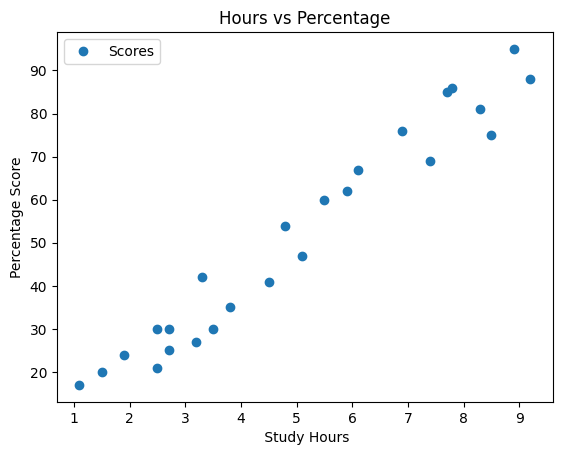

In [3]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o') 
#style='o'=>circle marker
plt.title('Hours vs Percentage')  
plt.xlabel(' Study Hours')  
plt.ylabel('Percentage Score')  
plt.show()

In [20]:
data.plot??

from the plot above we can clearly see that there is a linear relation between the two variables

## 4. Data Preprocessing

In [57]:
#divide the data into inputs X and outputs Y
#data.loc: selection by label
#data.iloc: selection by indexing(position)

X=data[['Hours']]
y=data[['Scores']]


In [9]:
from sklearn.model_selection import train_test_split

In [58]:
#split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

## 5. training the Algorithm

In [23]:
# time to train the linear regression algo
from sklearn.linear_model import LinearRegression
linearReg=LinearRegression()
linearReg.fit(X_train,y_train)

LinearRegression()

In [24]:
#print le linear coeff
print("Coefficients: \n", linearReg.coef_)

Coefficients: 
 [9.91065648]


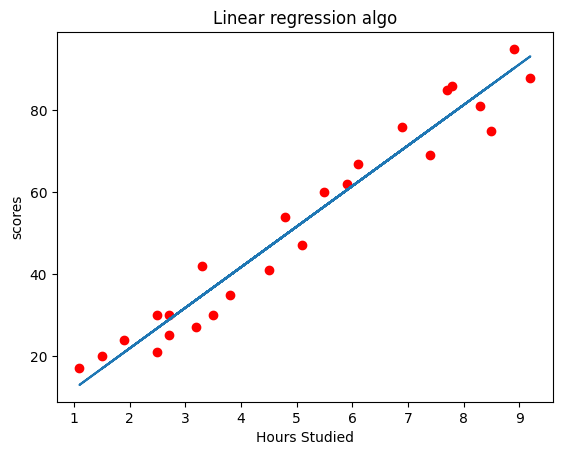

In [34]:
#visualize the regression line
#y=ax+b intercept is the b when all x =0 
line=linearReg.coef_*X+linearReg.intercept_
#plot
plt.scatter(X,y,color='red')
plt.title("Linear regression algo")
plt.xlabel("Hours Studied")
plt.ylabel("scores")
plt.plot(X,line)
plt.show()

## 6. Make Pred

In [30]:
#prediction
print(X_test)
y_hat=linearReg.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [27]:
y_hat

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [28]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [35]:
#compare actual values Vs predicted ones
df=pd.DataFrame({"Actual Score":y_test,"Predicted score":y_hat })
df

,Actual Score,Predicted score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## 7.Test on our own data

In [41]:
import numpy as np

In [60]:
# Q. what will be predicted score if a student studies for 9.25 hrs/day?
hours = 9.25
own_pred = linearReg.predict(np.array(hours).reshape(1, -1))
print("Nbre of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Nbre of Hours = 9.25
Predicted Score = 93.69173248737535


## 8. Evaluate the model

## to evaluate a linear Regression we can use various evaluation metrics:
 1 Coefficient of Determination or R-Squared (R2)
 
 2 Root Mean Squared Error (RSME) and Residual Standard Error (RSE)

In [48]:
from sklearn import metrics
print(" Mean Squared Error (RSME) :", metrics.mean_absolute_error(y_test,y_hat))

 Mean Squared Error (RSME) : 4.183859899002975


# Conclusion
### I was able to carry out prediction using Supervised ML and evaluate the model's performance 